In [ ]:
# manipulation data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#visualiation data

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
## The above libraries are needed for performing the machine learning and evaluating the machine learning models.





#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
train.shape

(550068, 12)

like we c her we had

550068 rows
12 coluns

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


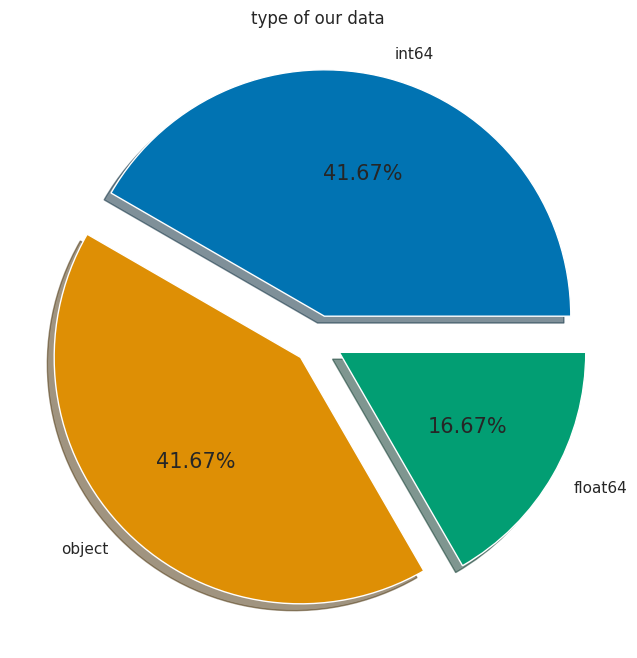

In [ ]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');

In [ ]:
# show the numirical values

num_columns = [f for f in train.columns if train.dtypes[f] != 'object']
num_columns.remove('Purchase')
num_columns.remove('User_ID')
num_columns

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [ ]:
# show the categorical values

cat_columns = [f for f in train.columns if train.dtypes[f] == 'object']
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [ ]:
train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


A basic observation is that:

Product P00265242 is the most popular product.

Most of the transactions were made by men.

Age group with most transactions was 26-35.

City Category with most transactions was B

but we will cover each of these in more depth later

finding missing values

In [ ]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


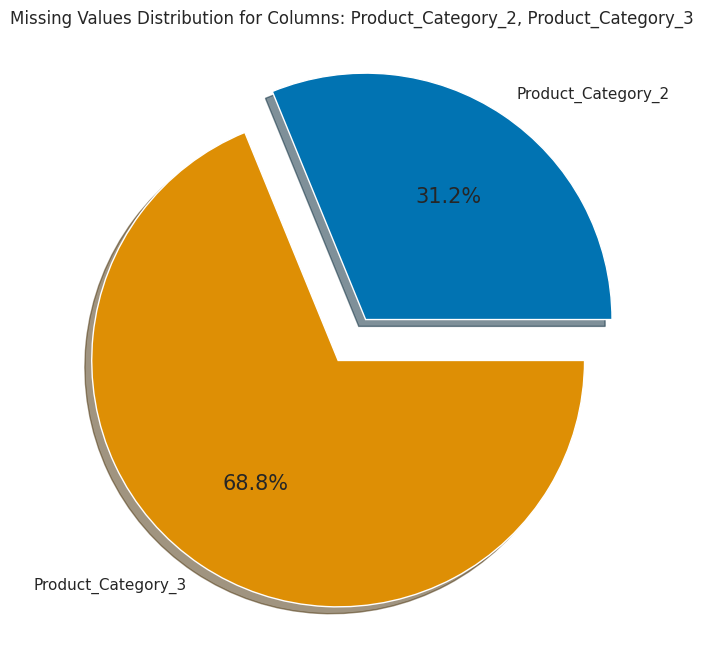

In [ ]:


# Assuming 'train' is your DataFrame
columns_to_plot = ['Product_Category_2', 'Product_Category_3']
missing_values = train[columns_to_plot].isnull().sum()

# Plotting a pie chart for missing values in the specified columns
plt.figure(figsize=(8, 8))
missing_values.plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True)
plt.title('Missing Values Distribution for Columns: {}'.format(', '.join(columns_to_plot)))
plt.show()


Only Product_Category_2 and Product_Category_3 have null values which is good news. However Product_Category_3 is null for nearly 70% of transactions so it can't give us much information. so we gonna drop Product_Category_3

Product_Category_2

In [ ]:
train.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [ ]:
train.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [ ]:
# Replace using median
median = train['Product_Category_2'].median()
train['Product_Category_2'].fillna(median, inplace=True)

Product_Category_3

In [ ]:
train.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [ ]:
# drop Product_Category_3
train=train.drop('Product_Category_3',axis=1)

In [ ]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


3. data visualization

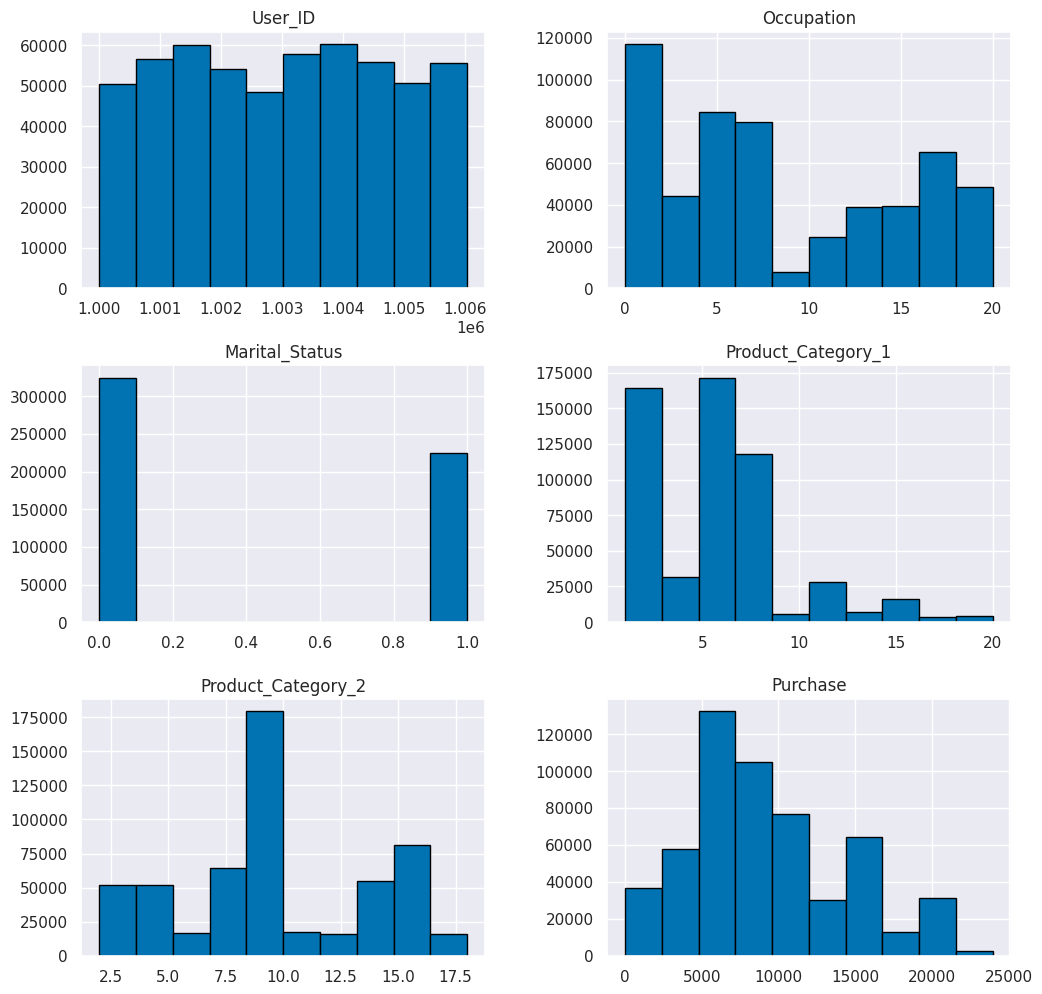

In [ ]:
train.hist(edgecolor='black',figsize=(12,12));

In [ ]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

A) Gender

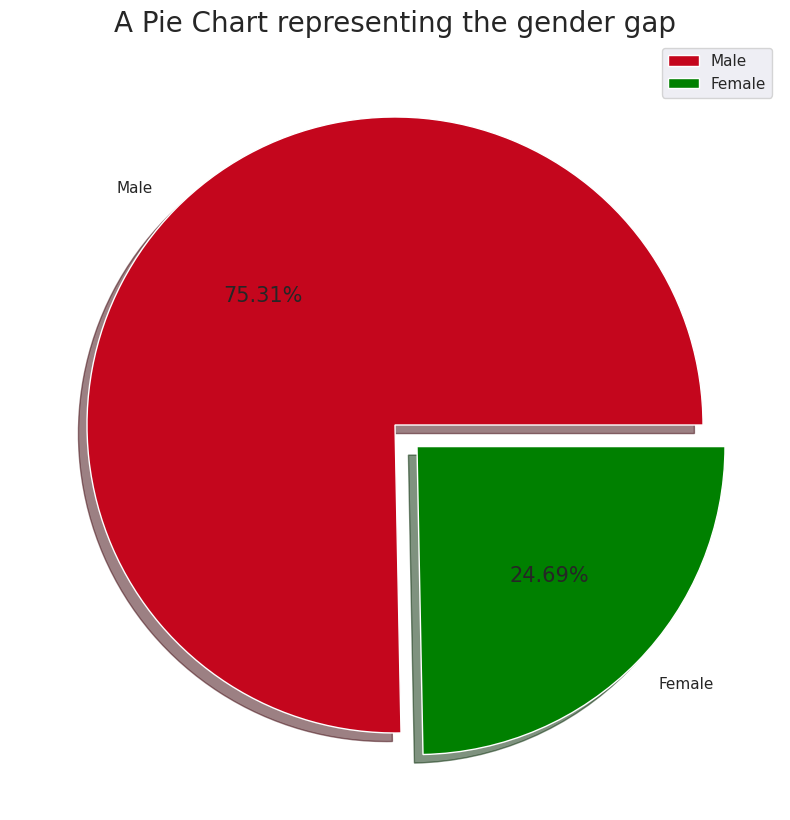

In [ ]:
# pie chart

size = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

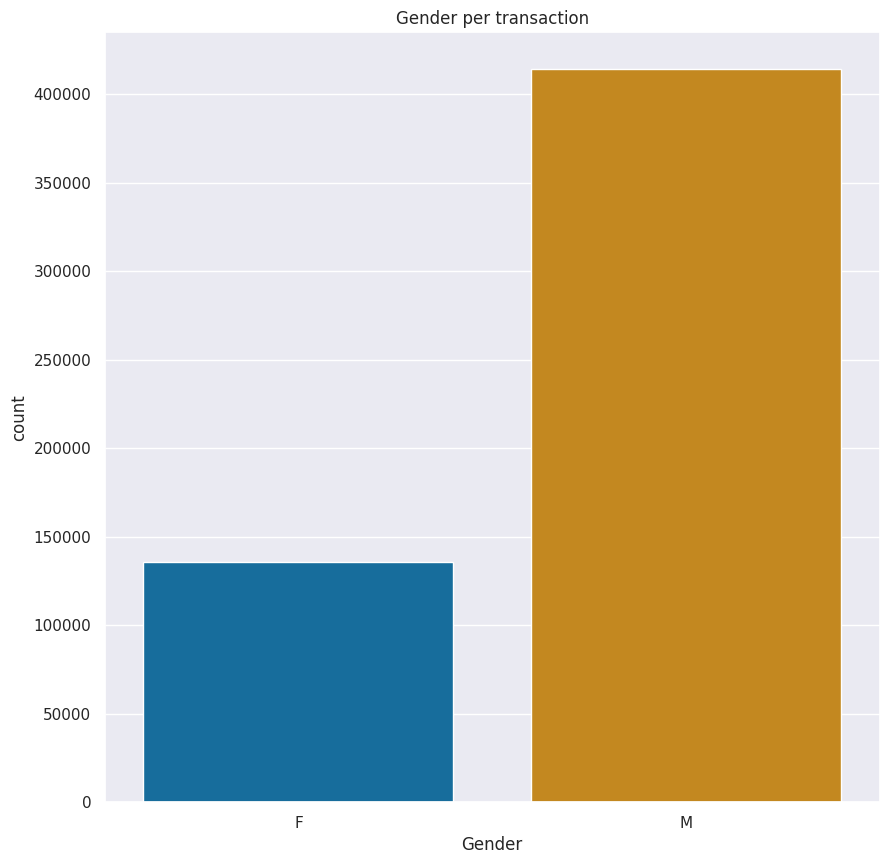

In [ ]:
sns.countplot(x=train.Gender)
plt.title('Gender per transaction');

B) Age

In [ ]:
ageData = sorted(list(zip(train.Age.value_counts().index, train.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data = [go.Bar(x=age,
               y=productBuy,
               name="How many products were sold",
               marker = dict(color=['black', 'yellow', 'green', 'blue', 'red', 'gray', '#C4061D'],
                            line = dict(color='#7C7C7C', width = .5)),
              text="Age: " + ageSeries)]
layout = go.Layout(title= "How many products were sold by ages")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

C) the occupation of customers

In [ ]:
palette=sns.color_palette("Set2")

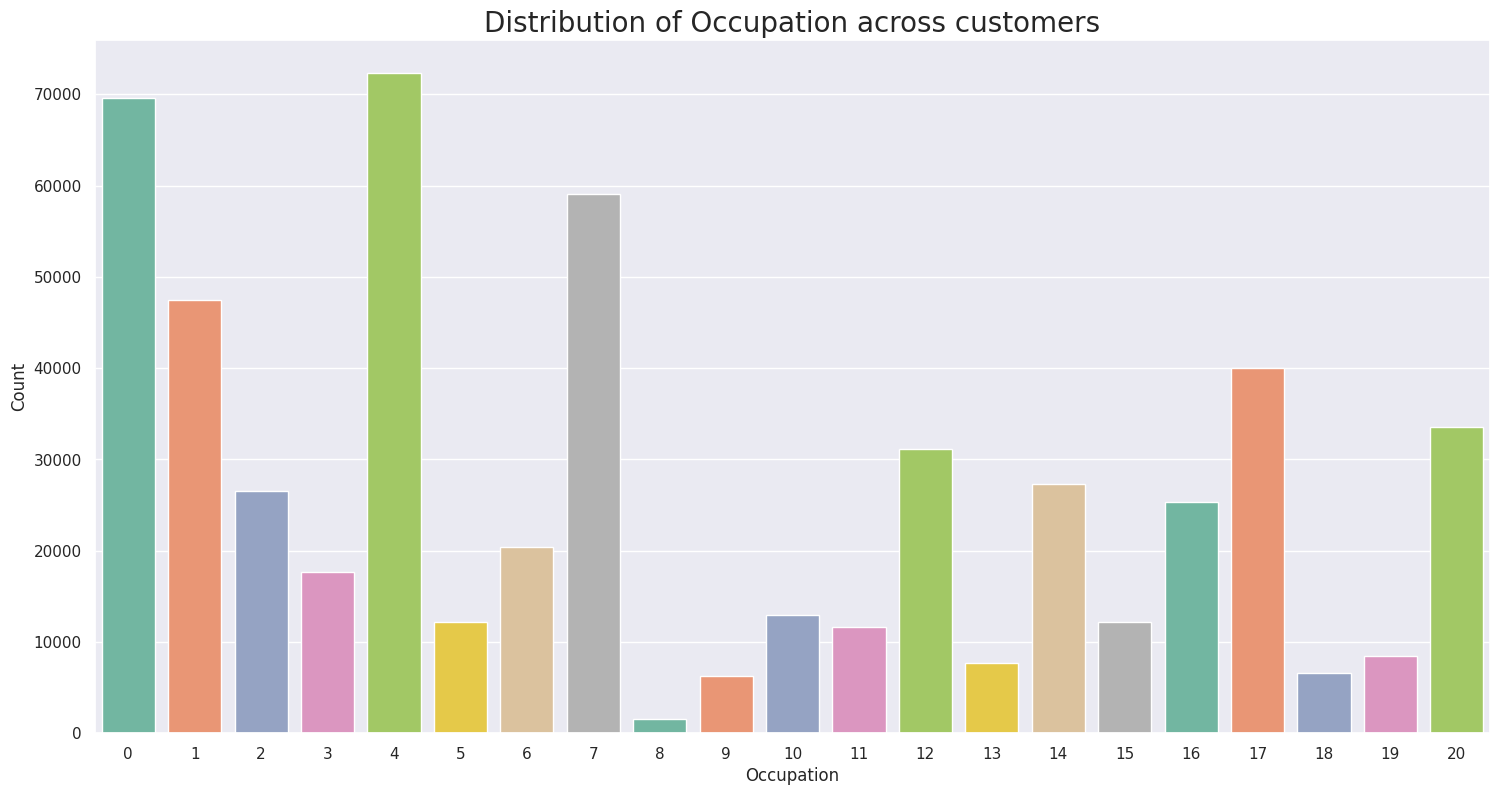

In [ ]:


# Set the figure size using Matplotlib's Figure class
fig, ax = plt.subplots(figsize=(18, 9))

# Create a count plot using Seaborn on the specified axis
sns.countplot(x='Occupation', data=train, palette=palette, ax=ax)

# Set the title, xlabel, and ylabel using Matplotlib's methods
ax.set_title('Distribution of Occupation across customers', fontsize=20)
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')

# Display the plot
plt.show()



Total Money Spent per Occupation

<ipython-input-27-09adf2f78516>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



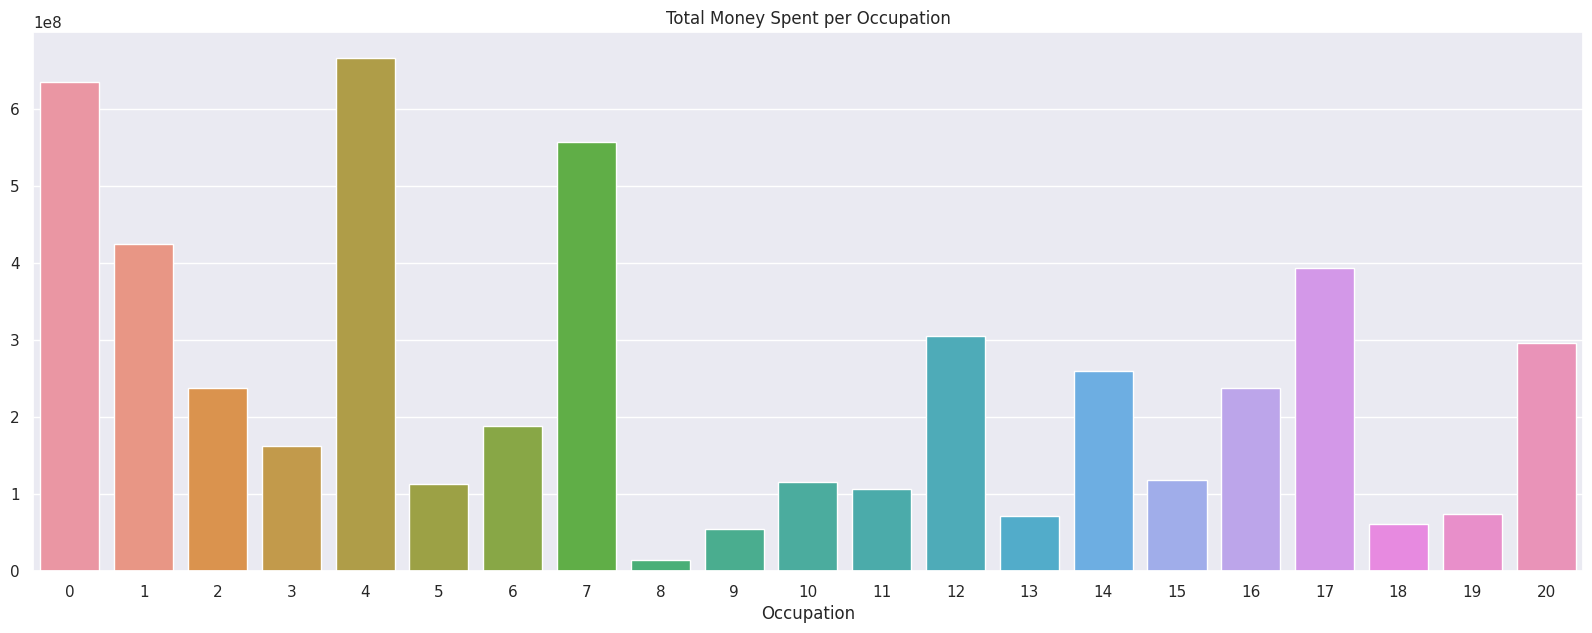

In [ ]:
spent_by_occ = train.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

Once again, the distribution of the mean amount spent within each occupation appears to mirror the distribution of the amount of people within each occupation. This is fortunate from a data science perspective, as we are not working with odd or outstanding features. Our data, in terms of age and occupation seems to simply make sense.

d) City_Category

<Figure size 1800x900 with 0 Axes>

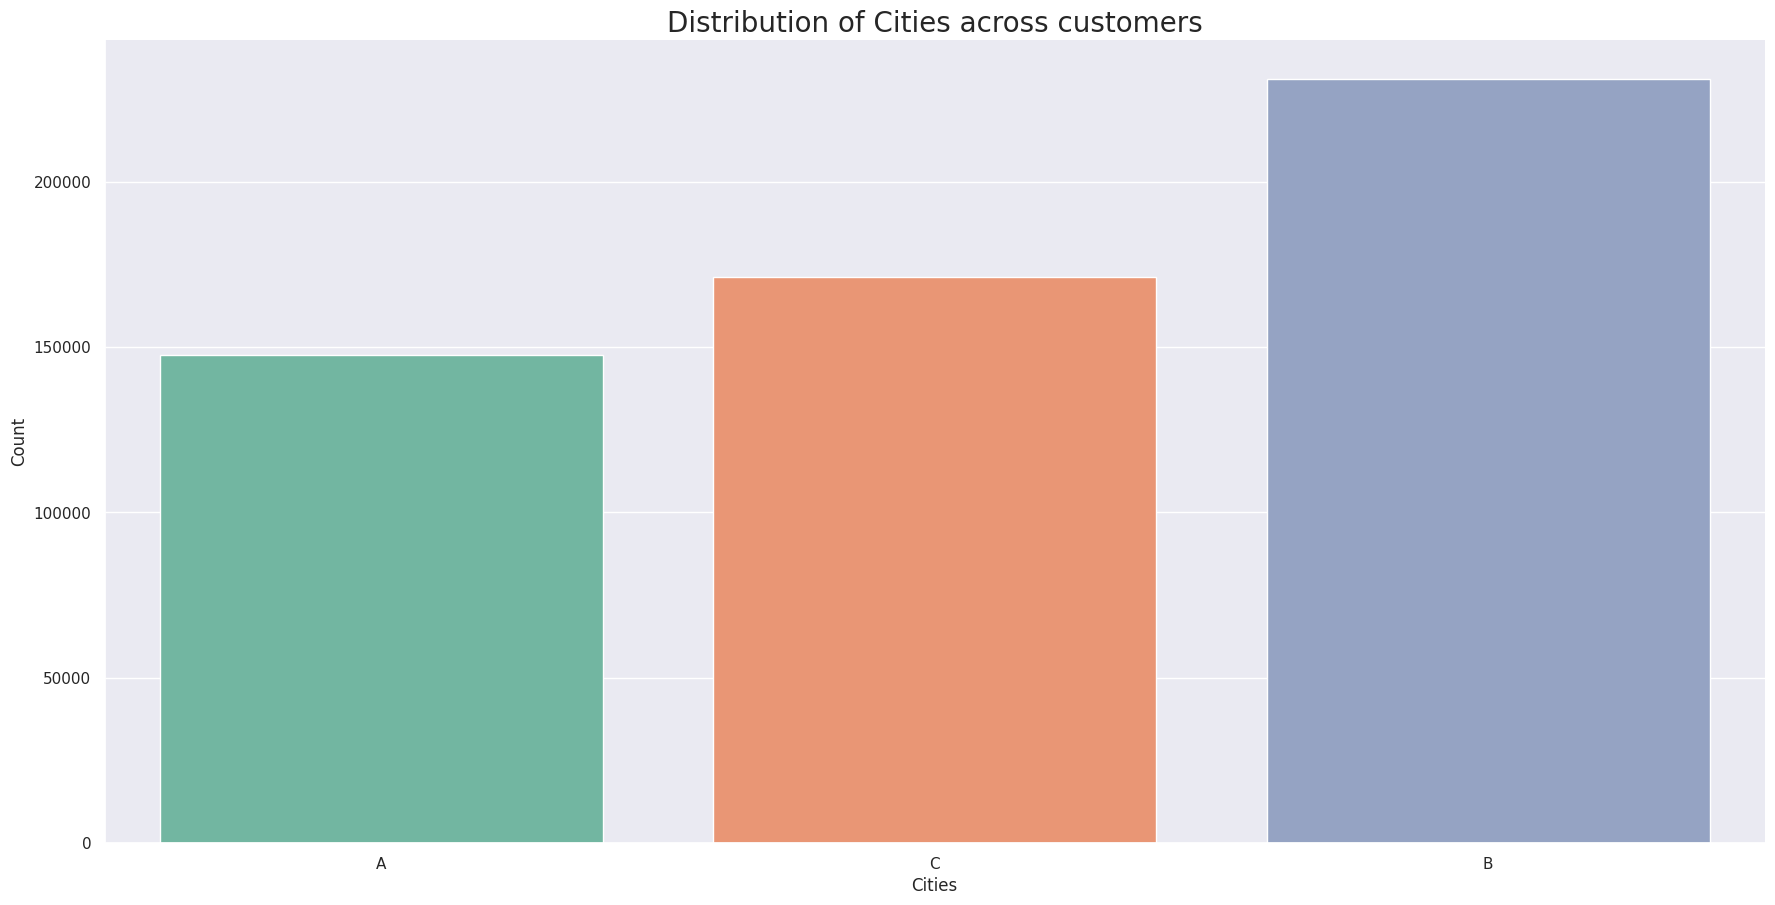

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size using Matplotlib's Figure class
plt.figure(figsize=(18, 9))

# Create a count plot using Seaborn's catplot
sns.catplot(x='City_Category', kind='count', data=train, palette=palette, height=9, aspect=2)

# Set the title, xlabel, and ylabel using Matplotlib's methods
plt.title('Distribution of Cities across customers', fontsize=20)
plt.xlabel('Cities')
plt.ylabel('Count')

# Display the plot
plt.show()


E) Products

Here we explore the products themselves. This is important, as we do not have labeled items in this dataset. Theoretically, a customer could be spending $5,000 on 4 new TVs, or 10,000 pens. This difference matters for stores, as their profits are affected. Since we do not know what the items are, let's explore the categories of the items.

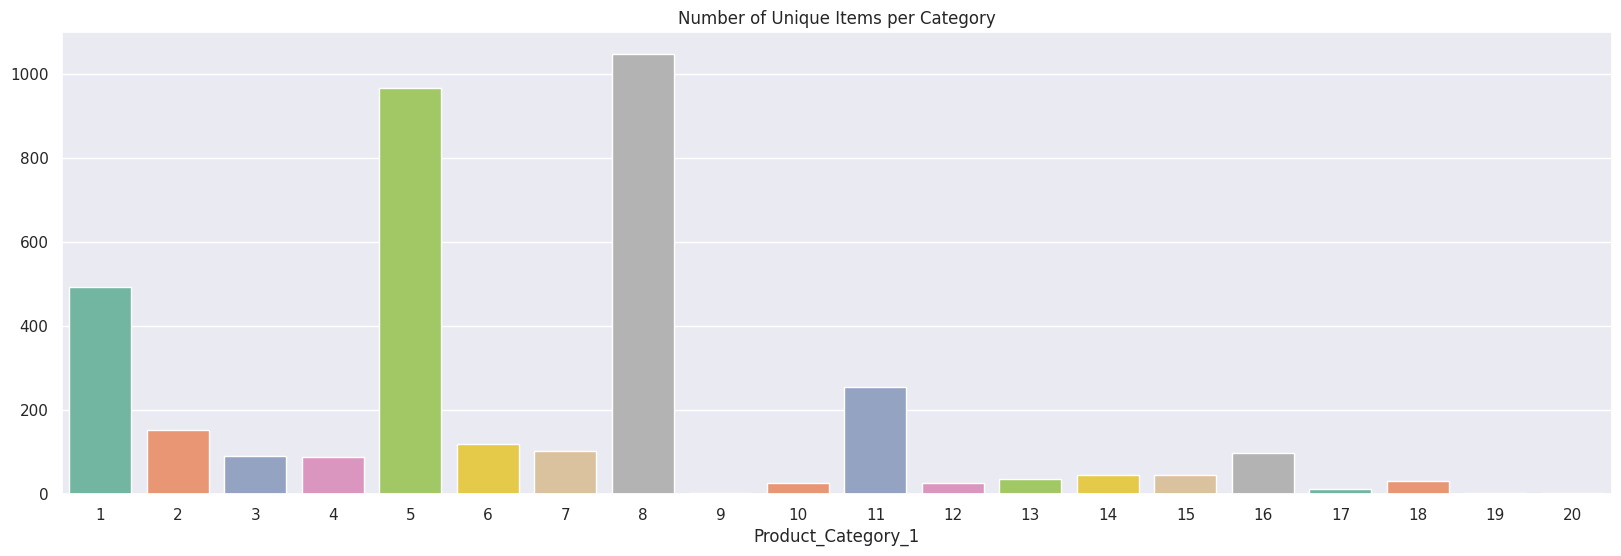

In [ ]:
plt.figure(figsize=(20,6))
prod_by_cat = train.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

Category labels 1, 5, and 8 clearly have the most items within them. This could mean the store is known for that item, or that the category is a broad one

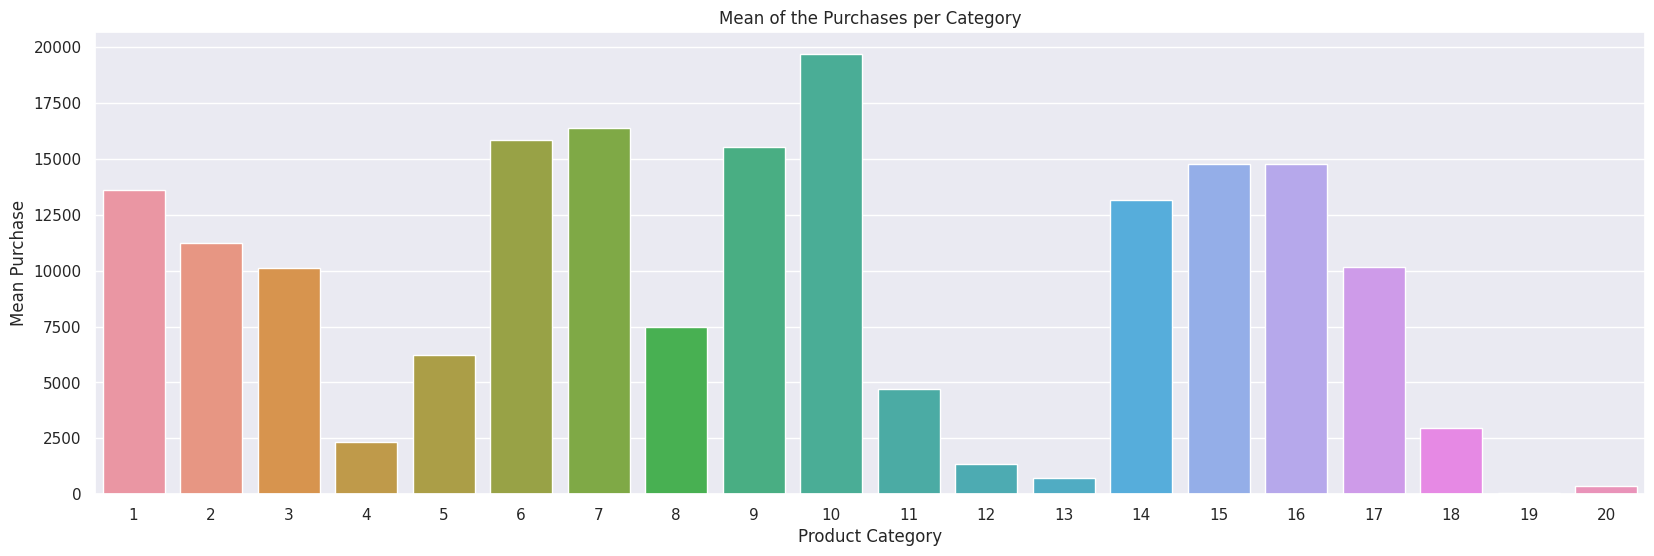

In [ ]:
category = []
mean_purchase = []


for i in train['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(train[train['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(20,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

<Figure size 1500x2500 with 0 Axes>

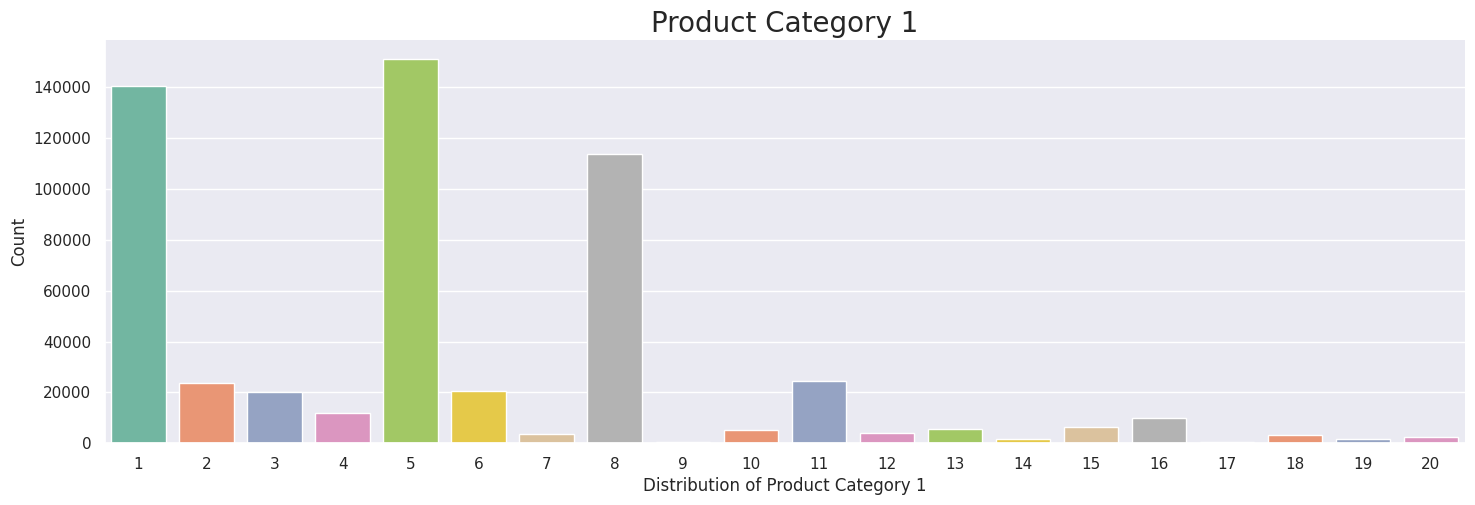

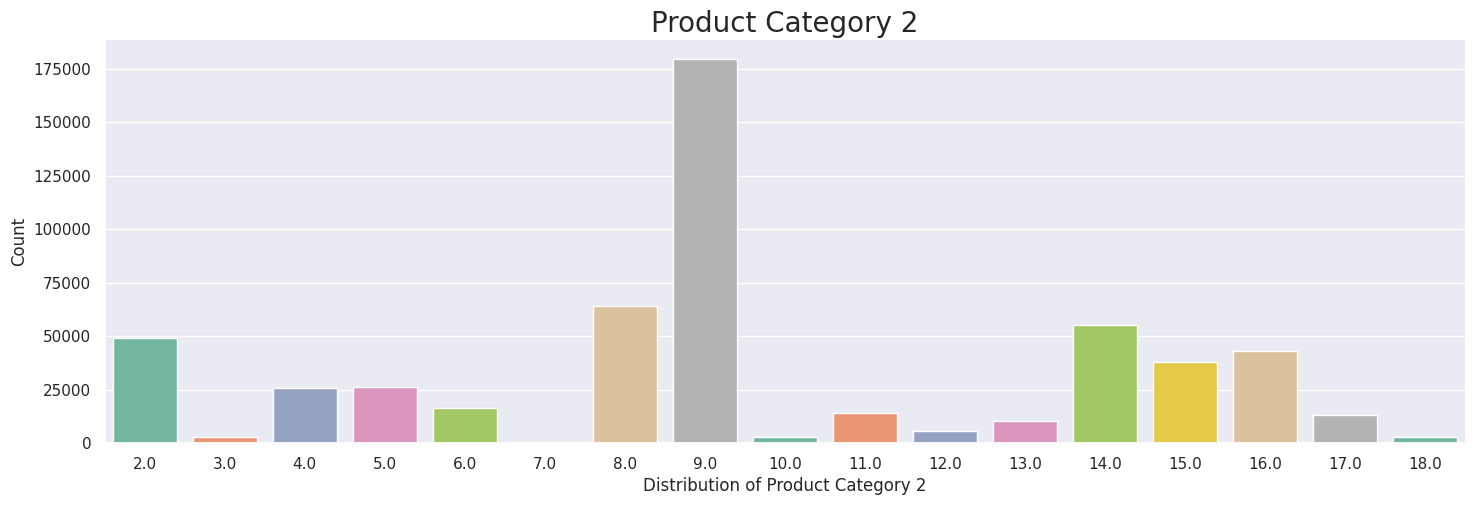

In [ ]:
# visualizing the different product categories

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size using Matplotlib's Figure class
plt.figure(figsize=(15, 25))

# Create count plots for Product_Category_1 and Product_Category_2 using Seaborn's catplot
sns.catplot(x='Product_Category_1', kind='count', data=train, palette=palette, height=5, aspect=3)
plt.title('Product Category 1', fontsize=20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

sns.catplot(x='Product_Category_2', kind='count', data=train, palette=palette, height=5, aspect=3)
plt.title('Product Category 2', fontsize=20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

# Display the plot
plt.show()


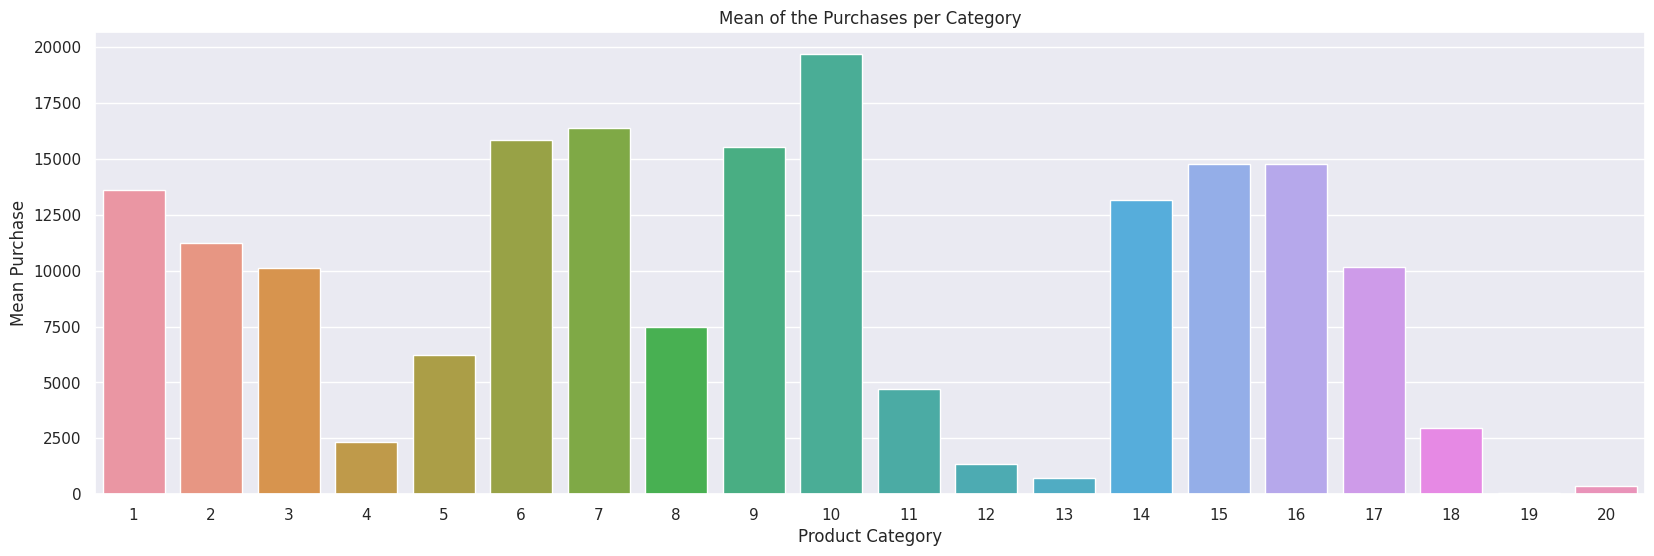

In [ ]:
category = []
mean_purchase = []


for i in train['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(train[train['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(20,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

In [ ]:
# importing important libraries
from scipy import stats
from scipy.stats import norm

<ipython-input-34-6dbae02b5968>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


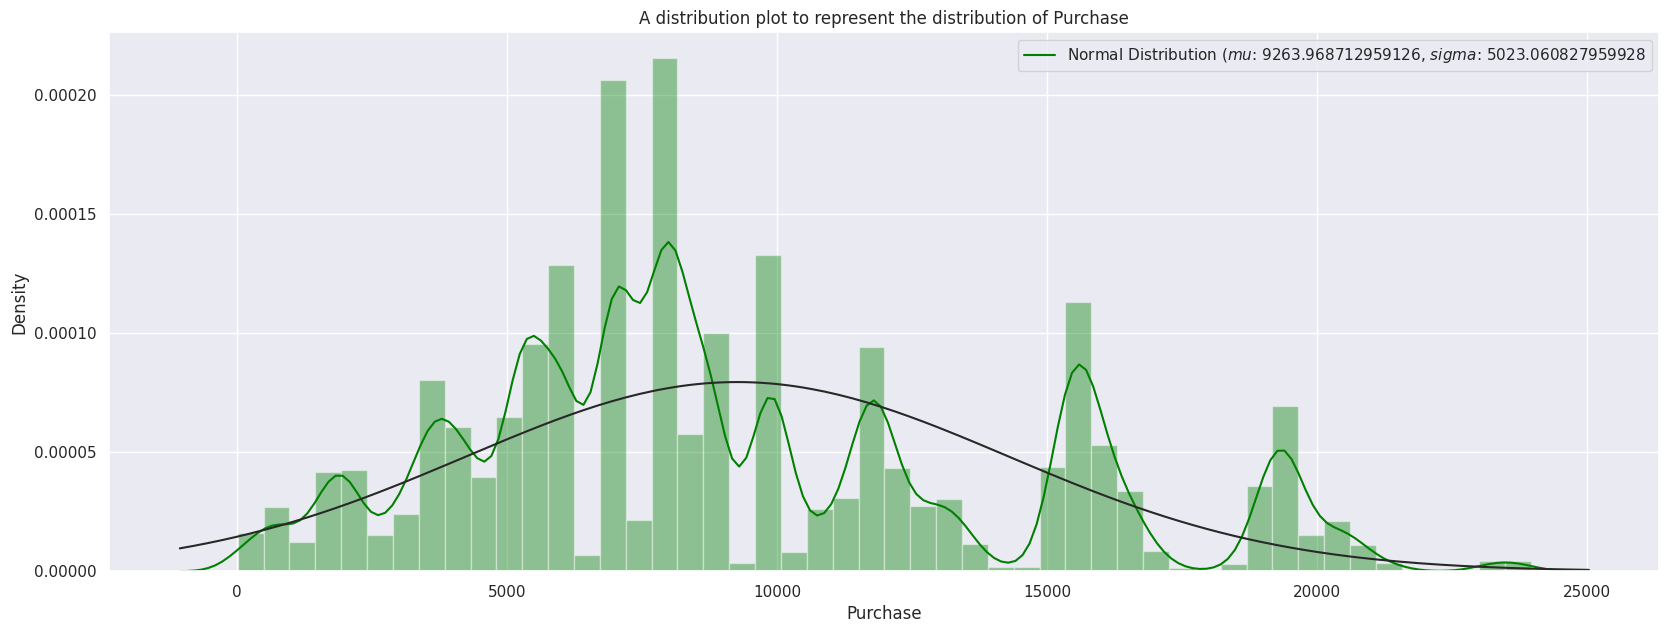

In [ ]:
# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(train['Purchase'], color = 'green', fit = norm)

# fitting the target variable to the normal curve
mu, sigma = norm.fit(train['Purchase'])
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

data selection

first we gonna drop the :

User_ID
Product_I

In [ ]:
train = train.drop(['Product_ID','User_ID'],axis=1)

In [ ]:
# checking the new shape of data
print(train.shape)
train

(550068, 9)


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.0,368
550064,F,26-35,1,C,3,0,20,9.0,371
550065,F,26-35,15,B,4+,1,20,9.0,137
550066,F,55+,1,C,2,0,20,9.0,365


label encoding

In [ ]:
df_Gender = pd.get_dummies(train['Gender'])
df_Age = pd.get_dummies(train['Age'])
df_City_Category = pd.get_dummies(train['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])

data_final= pd.concat([train, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
data_final

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,...,51-55,55+,A,B,C,0,1,2,3,4+
0,10,0,3,9.0,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,9.0,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,9.0,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,9.0,368,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
550064,1,0,20,9.0,371,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
550065,15,1,20,9.0,137,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
550066,1,0,20,9.0,365,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
data_final.dtypes

Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
F                       uint8
M                       uint8
0-17                    uint8
18-25                   uint8
26-35                   uint8
36-45                   uint8
46-50                   uint8
51-55                   uint8
55+                     uint8
A                       uint8
B                       uint8
C                       uint8
0                       uint8
1                       uint8
2                       uint8
3                       uint8
4+                      uint8
dtype: object

Predicting the Amount Spent
we will use one of the simplest machine learning models, i.e. the linear regression model, to predict the amount spent by the customer on Black Friday.

Linear regression represents a very simple method for supervised learning and it is an effective tool for predicting quantitative responses. You can find basic information about it right here: Linear Regression in Python

This model, like most of the supervised machine learning algorithms, makes a prediction based on the input features. The predicted output values are used for comparisons with desired outputs and an error is calculated. The error signal is propagated back through the model and model parameters are updating in a way to minimize the error. Finally, the model is considered to be fully trained if the error is small enough. This is a very basic explanation and we are going to analyze all these processes in details in future articles.

split data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
x=data_final.drop('Purchase',axis=1)
y=data_final.Purchase

In [ ]:
print(x.shape)
print(y.shape)

(550068, 21)
(550068,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Linear Regression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=model.predict(x_test)
## Predicting on X_test

In [ ]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=(np.sqrt(mean_squared_error(y_test,y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.12633186492539328
mean_absolute_error:  3595.9755000659443
mean_squared_error:  22047077.00141334
root_mean_squared_error:  4695.431503218138


The above evaluation metrics help us to find how well our model is performing. As we can see the r2_score is only 0.20 and as the Root mean square error is high the model is not very accurate to predict the purchases or the target column.

Decision Tree Regressor

In [ ]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
#predicting train
train_preds=DT.predict(x_train)
#predicting on test
test_preds=DT.predict(x_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(x_train, y_train))
print('RSquared value on test:',DT.score(x_test, y_test))

RMSE TrainingData =  2973.781456838257
RMSE TestData =  2982.9555395099565
--------------------------------------------------
RSquared value on train: 0.6494858505940616
RSquared value on test: 0.6473945359913571


The Decision Tree Regressor is better compared to Linear regression as it can be observed that the root mean square error is less as compared to the previous model and the RSuared value is higher in this model.

Random Forest Regressor

In [ ]:
RF=RandomForestRegressor().fit(x_train,y_train)

In [ ]:
#predicting train
train_preds1=RF.predict(x_train)
#predicting on test
test_preds1=RF.predict(x_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(x_train, y_train))
print('RSquared value on test:',RF.score(x_test, y_test))

RMSE TrainingData =  2544.8349920102537
RMSE TestData =  3006.1029363846565
--------------------------------------------------
RSquared value on train: 0.7433113230451491
RSquared value on test: 0.6419009466896519


The Random Forest regressor model is again better than the previous model as we have a lower root mean square error value and the Rsquared value is higher than the previous model.

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [ ]:
test.isnull().sum()
## Checking for missing values present in the test dataset

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

The null values in the test data have to be treated as well.

In [ ]:
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
test['Product_ID'] = ss.fit_transform(test['Product_ID'].values.reshape(-1, 1))
## The 'P00' value has been replaced int he ProductId column and the column has been scaled.

In [ ]:
test.drop(['Product_Category_3'],axis=1,inplace=True)
## As the Product_Category_3 column in the train set had been removed. Same has been done here aswell.

In [ ]:
test['Product_Category_2']=test['Product_Category_2'].fillna(test['Product_Category_2'].mean())
## Product_Category_2 has been imputed with mean

In [ ]:
test.isnull().sum()
## As we see there are no null values in the test dataframe as well.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [ ]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.000000
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.000000
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.000000
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.000000
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.000000
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,F,26-35,15,B,4+,1,8,9.849586
233595,1006036,0.801456,F,26-35,15,B,4+,1,5,8.000000
233596,1006036,-1.389691,F,26-35,15,B,4+,1,1,5.000000
233597,1006037,-0.476058,F,46-50,1,C,4+,0,10,16.000000


Label Encoding categorical data

In [ ]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    test[i]=le.fit_transform(test[i])
test.dtypes
## The label encoding technique will now replace all the categorical variables to numeric for easier computation.

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

Categorical data in the test dataframe are converted to numeric values using label encoding

In [ ]:
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+','4')
## The 4+ value in the Stay_In_Current_City_Years have been replaced with only 4.

In [ ]:
test['Gender']=test['Gender'].astype(int)
test['Age']=test['Age'].astype(int)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype(int)
test['City_Category']=test['City_Category'].astype('category')
## The values in the test set have been converted to integer types as done in the train set.

In [ ]:
test= pd.get_dummies(test)
## Dummies are created for the test set.

In [ ]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.0,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.0,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.0,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.0,0,0,1


Shape of the train data

In [ ]:
train.shape
# train data shape

(550068, 9)

Shape of the test data.

In [ ]:
test.shape
# test data shape

(233599, 12)

In [ ]:
train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.0,368
550064,F,26-35,1,C,3,0,20,9.0,371
550065,F,26-35,15,B,4+,1,20,9.0,137
550066,F,55+,1,C,2,0,20,9.0,365


In [ ]:
test

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.000000,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.000000,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.000000,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.000000,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,0,2,15,4,1,8,9.849586,0,1,0
233595,1006036,0.801456,0,2,15,4,1,5,8.000000,0,1,0
233596,1006036,-1.389691,0,2,15,4,1,1,5.000000,0,1,0
233597,1006037,-0.476058,0,4,1,4,0,10,16.000000,0,0,1


In [ ]:
test_preds= RF.predict(test)
len(test_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



ValueError: X has 12 features, but RandomForestRegressor is expecting 21 features as input.

As random forest regressor performed very well compared to linear regression and decision tree regressor model. Random forest regressor model has been used to predict on our test dataset.

In [ ]:
id_frame=pd.read_csv('/content/test.csv')

In [ ]:
ID_info= id_frame[["User_ID","Product_ID"]]
ID_info.head()
## Using User_Id and Product_Id from the test set.

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [ ]:
predictions= pd.DataFrame(test_preds, columns=["Purchase"])
predictions["User_ID"]= ID_info["User_ID"]
predictions["Product_ID"]= ID_info["Product_ID"]
predictions.head()
## Predictions have been save in the form of a dataframe

,Purchase,User_ID,Product_ID
0,7230.956346,1000004,P00128942
1,7432.966829,1000009,P00113442
2,10509.076053,1000010,P00288442
3,7432.966829,1000010,P00145342
4,13170.177510,1000011,P00053842


In [ ]:
predictions.to_csv('BlackFridayPredictions.csv', index=False)
## Finally converted the prediction into csv format.